# First Model

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
processed_data_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/data/processed/'
ESC50_MFCC_train=np.loadtxt(processed_data_path+'ESC50_MFCC_train.csv',delimiter=',')
firearm_MFCC_train=np.loadtxt(processed_data_path+'firearm_MFCC_train.csv',delimiter=',')

In [6]:
print(ESC50_MFCC_train.shape)
print(firearm_MFCC_train.shape)

(500, 4320)
(32, 3520)


There is a problem because somehow they do not have the same number of columns. I may need to go back and identify how to ensure that I get the same shape during feature extraction. For now I will truncate the number of columns of ESC50_MFCC_train. 

In [8]:
ESC50_MFCC_train_truncate=ESC50_MFCC_train[:, 0:3520]
print(ESC50_MFCC_train_truncate.shape)

(500, 3520)


Next, I will merge the two into one and then also instantiate an output vector. 

In [10]:
X_train=np.concatenate((ESC50_MFCC_train_truncate,firearm_MFCC_train),axis=0)
print(X_train.shape)

(532, 3520)


In [16]:
Y_train=np.concatenate((np.zeros((500,1)),np.ones((32,1))))
print(Y_train.shape)

(532, 1)


## Training a Model in TensorFlow

In [28]:
from tensorflow.keras import layers

NN = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
NN.add(layers.Dense(532, activation='relu'))
# Add another:
NN.add(layers.Dense(64, activation='relu'))
# Add an output layer with 2 output units:
NN.add(layers.Dense(1))

NN.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=NN.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 8/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 9/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 10/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+0

In [26]:
NN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  1873172   
_________________________________________________________________
dense_13 (Dense)             multiple                  34112     
_________________________________________________________________
dense_14 (Dense)             multiple                  65        
Total params: 1,907,349
Trainable params: 1,907,349
Non-trainable params: 0
_________________________________________________________________


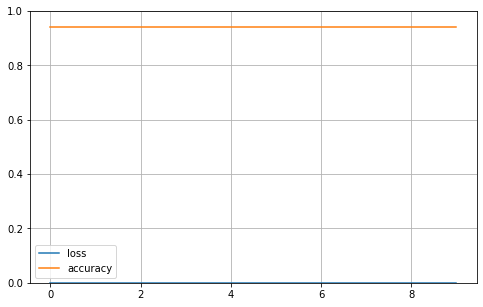

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show();